In [ ]:
# this cell is just to test that all dependencies are installed
import keras
import sklearn
import matplotlib
import PIL
import tensorflow
from tensorflow.python.client.device_lib import list_local_devices
print(f'using device(s): {" ".join([d.name for d in list_local_devices()])}')
from keras import backend as K
assert K.image_data_format() == 'channels_last', 'section on convolutional layers assumes channels_last...'
print(f'using keras version: {keras.__version__}')
print(f'using tensorflow version: {tensorflow.__version__}')


## <center> Deep Learning in Python
 <center> Devin Conathan
### <center> April 12, 2018
    
<center> [github](https://github.com/dconathan/madpy-deep-learning)

<center> [meetup](https://www.meetup.com/MadPython/events/246900323/)

## Supervised Machine Learning
### Lightning review

- You're given a labeled data set (**features** $X$ and **labels** $y$).
- Build a model that captures **relationships** or **patterns** between $X$ and $y$ in such a way that generalizes to new data.
- Use model to **predict** $y$ given a new unlabeled data set $X$.
- Profit?

Essentially, you are finding a function that maps $X$ to $y$.

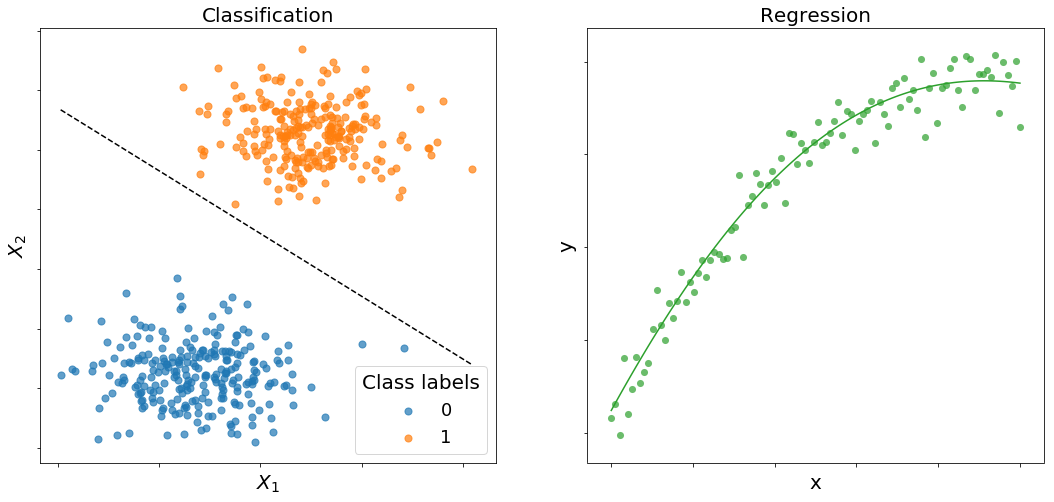

It's up to you (and math) to find the best function for the job.

## Optimization
Given some set of *parameterized* models $f_\theta$ (that is, a model for every set of parameters $\theta$), find the $\theta$ that minimizes your "error" or "loss" function, $\mathcal{L}$:
    
$$
\theta^* = \text{argmin } \mathcal{L}(f_\theta, X, y)
$$

### Example

The set of linear models of the form $f_\theta(x) = mx + b$

Here, $\theta = (m, b)$

Given $\mathcal{D}$, a collection of $(x, y)$ points , find the $\theta$ that minimizes $\sum_{\mathcal{D}}(f_\theta(x) - y)^2$

This is called the *least squares* model

## (Stochastic) Gradient Descent

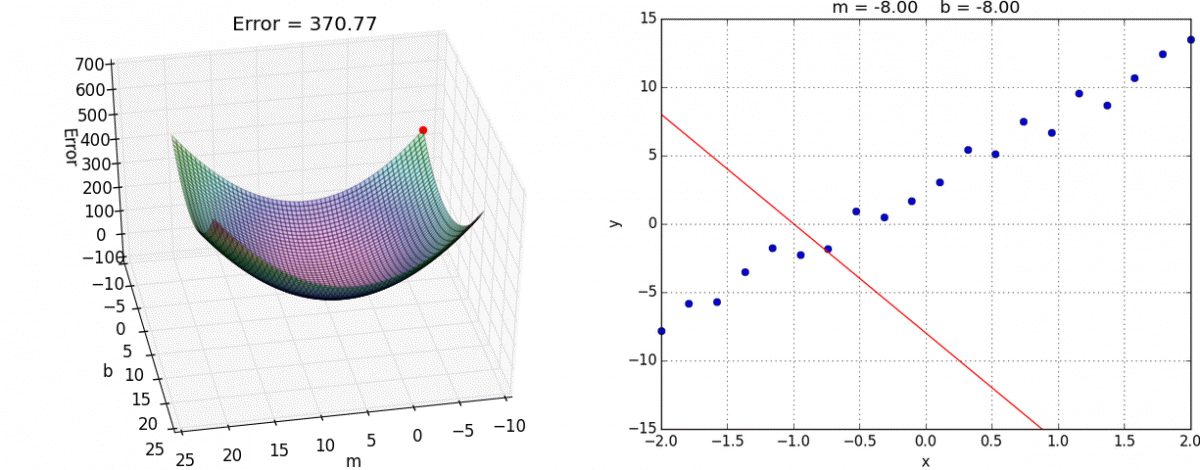

### Deep Learning

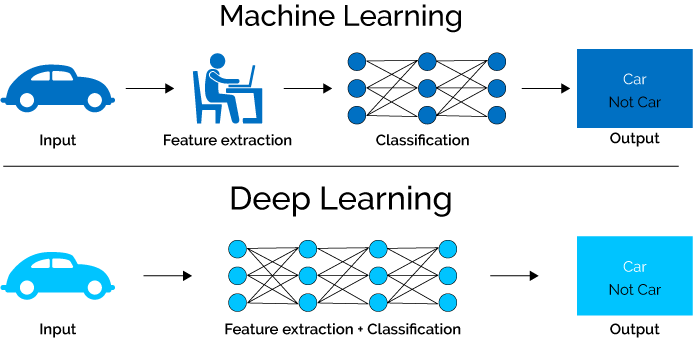


### It's just matrix multiplication...
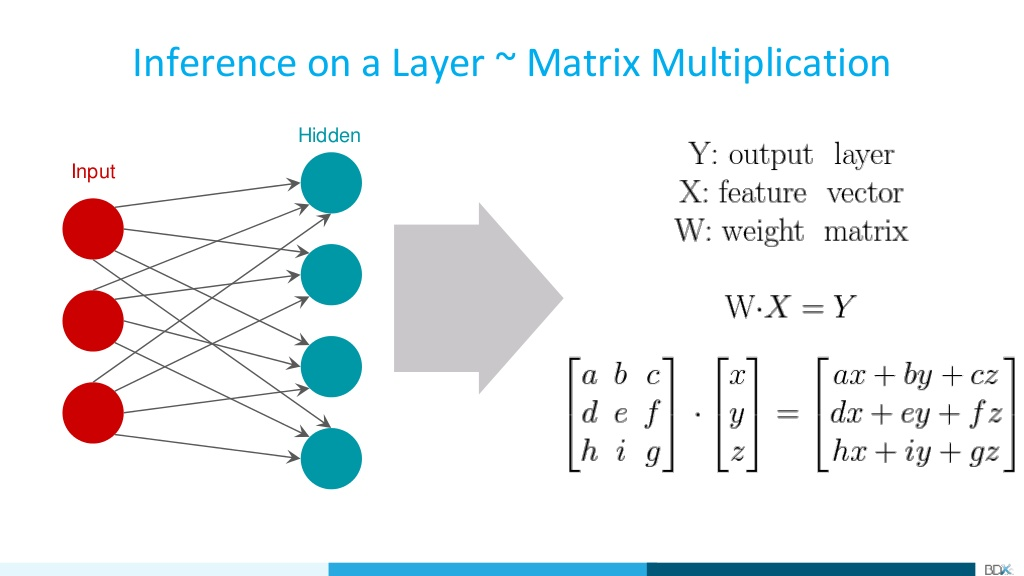


### Activation functions
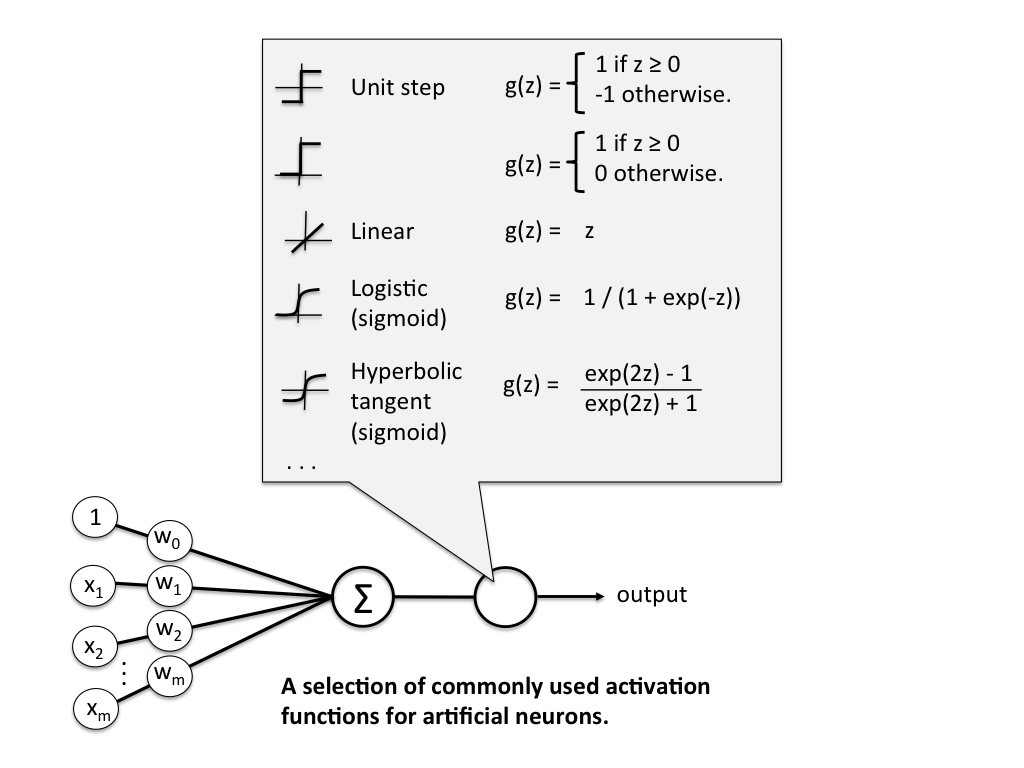


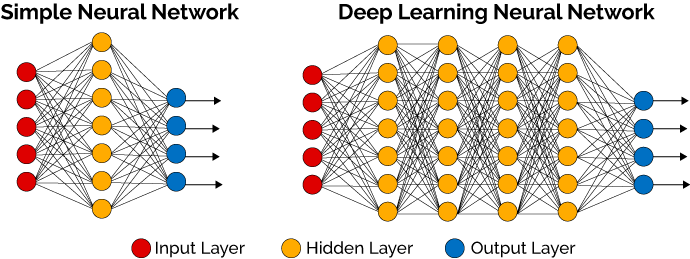


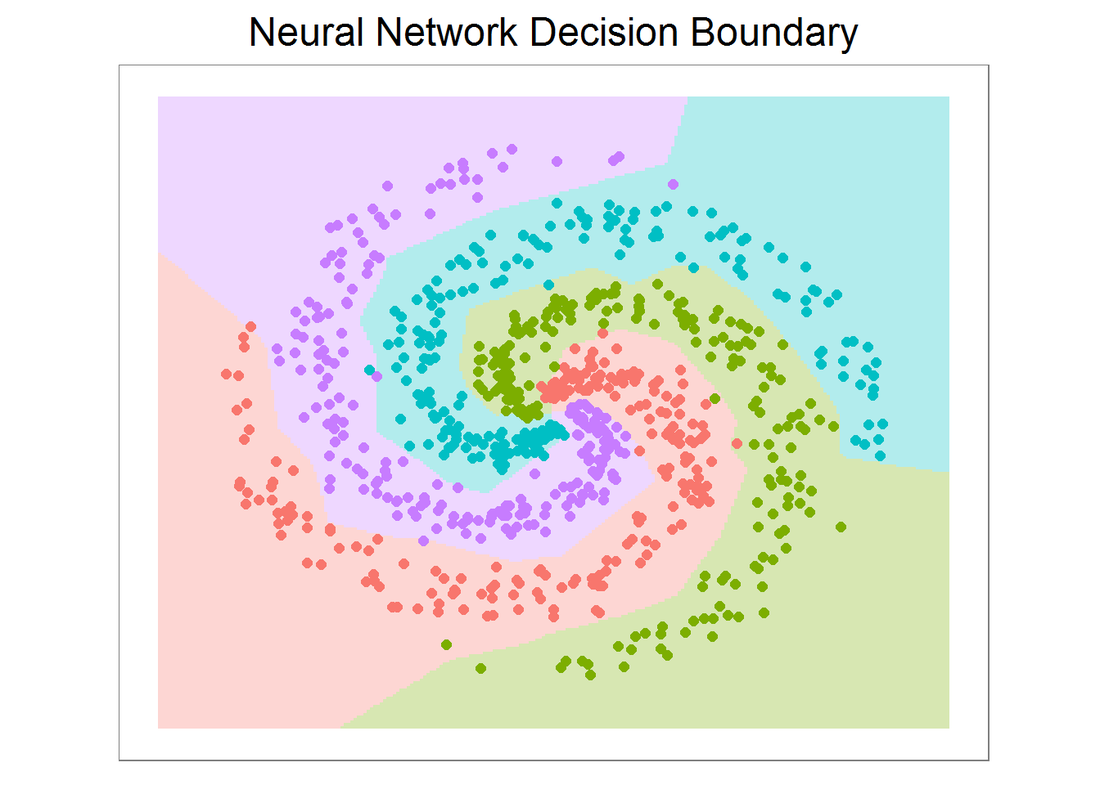


## Deep Learning Today

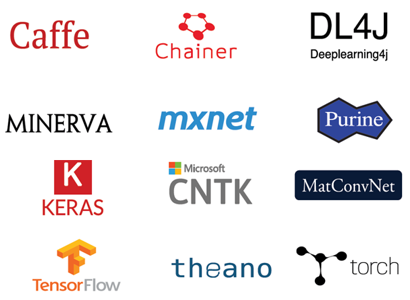
It's kind of getting out of hand...

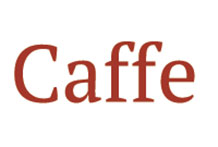

> Caffe supports many different types of deep learning architectures geared towards image classification and image segmentation. It supports CNN, RCNN, LSTM and fully connected neural network designs.

https://en.wikipedia.org/wiki/Caffe_(software)

http://caffe.berkeleyvision.org/

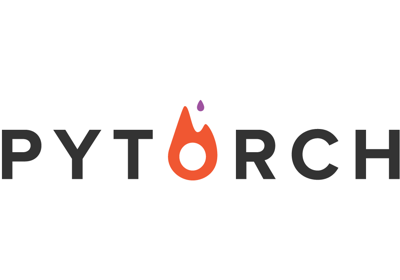

> Tensors and Dynamic neural networks in Python 
with strong GPU acceleration.
PyTorch is a deep learning framework that puts Python first.
We are in an early-release Beta. Expect some adventures. 

https://en.wikipedia.org/wiki/PyTorch

http://pytorch.org/



> TensorFlow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks.

https://en.wikipedia.org/wiki/TensorFlow

https://www.tensorflow.org/


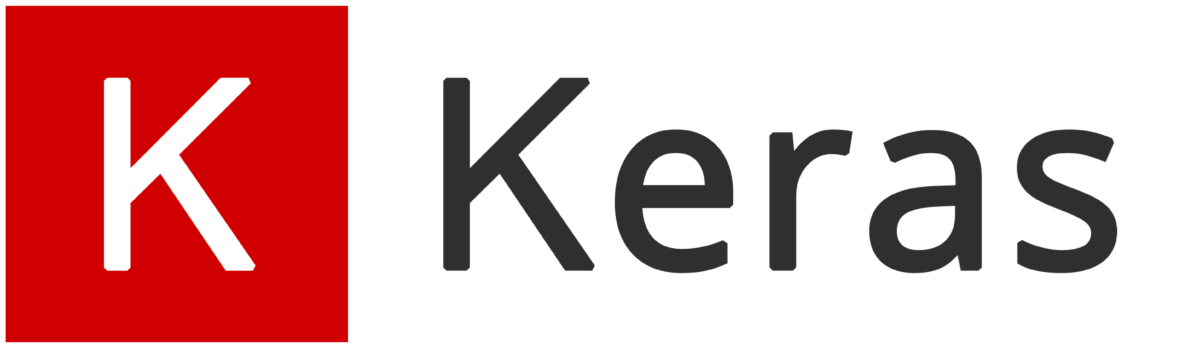

> Keras is an open source neural network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, Theano, or MXNet. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

https://en.wikipedia.org/wiki/Keras

https://keras.io/

# Keras

Keras borrows the scikit-learn API:

```python
# once created, .fit your model
model.fit(X_train, y_train)

# once fit, you can call .predict on new data
y_hat = model.predict(X_test)

# lots of scikit-learn utils still apply!
from sklearn.metrics import f1_score
score = f1_score(y_test, y_hat)
```

### Building a model, 2 ways

Keras offers two APIs for building neural networks:

You can think of your model as a **list of layers** or a **function**

  #### List of layers
https://keras.io/models/sequential/
 - `from keras.model import Sequential`
 - `from keras.layers import Dense`
 - `.compile()`
 - `.fit()`
 - `.predict()`

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_shape=(100,)))
model.add(Dense(10))

In [ ]:
model.summary()

In [ ]:
# You can also create your model as a list of layers
model = Sequential(
    [
        Dense(10, input_shape=(100,)),
        Dense(10)
    ])

model.summary()

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(format='svg'))

#### Function

https://keras.io/models/model/

Treat layers as functions instead of objects.

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

x_in = Input(shape=(100,))  # create input layer
h = Dense(32)(x_in)  # first layer is a *function* you call with the input layer as its input
x_out = Dense(32)(h)  # next layer is a *function* with the previous layer as its input

# create a model that specifies which layers are inputs and outputs.
model = Model(inputs=x_in, outputs=x_out)

model.summary()

In [ ]:
SVG(model_to_dot(model).create(format='svg'))

In [ ]:
# The functional API makes it WAY easier to make ridiculous architectures...

from keras.layers import Concatenate

# 2 inputs
x1_in = Input(shape=(100,))
x2_in = Input(shape=(10,))
# branch 1
h1 = Dense(10)(x1_in)
h1 = Dense(10)(h1)
h1 = Dense(10)(h1)
# first output
x1_out = Dense(10)(h1)
# branch 2
h2 = Dense(10)(x1_in)
# merge branches
h = Concatenate()([h1, x2_in])
h = Dense(10)(h)
h = Concatenate()([h, h2])
# second output
x2_out = Dense(10)(h)

model = Model(inputs=[x1_in, x2_in], outputs=[x1_out, x2_out])

In [ ]:
SVG(model_to_dot(model).create(format='svg'))

## MNIST

> The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

https://en.wikipedia.org/wiki/MNIST_database


a.k.a. the "hello world" of deep learning...

### Load the data

The `keras.datasets` is a magic module that downloads the data if you don't have it.

The raw data here are just matrices of pixel values.

Here they are loaded as `np.ndarray`s.

In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

d1 = X_train.shape[1]
d2 = X_train.shape[2]

print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

In [ ]:
import random
from PIL import Image
from matplotlib.pyplot import imshow
% matplotlib inline

i = random.randint(0, len(X_train))
imshow(Image.fromarray(X_train[i]).resize((200, 200)))
print(f'y_train[{i}]: {y_train[i]}')

### Minor preprocessing

Scale data matrix to have values between 0 and 1

Transform labels into "categorical" or "one-hot encoded" labels

`1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]`, etc.

In [ ]:
print(f'X_train.max() before: {X_train.max()}')
X_train = X_train / 255
X_test = X_test / 255
print(f'X_train.max() after: {X_train.max()}')

In [ ]:
from keras.utils import to_categorical
print(f'y_train.shape before: {y_train.shape}')
print(f'y_train[0] before: {y_train[0]}\n')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(f'y_train.shape after: {y_train.shape}')
print(f'y_train[0] after: {y_train[0]}')

### Baseline model

Let's test accuracy of a simple (linear) model...

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

baseline_model = SGDClassifier(max_iter=20, n_jobs=-1)
# need to reshape the X_ matrices so each example is a 1-dimensional vector
# also note the .argmax(axis=1) to convert labels back from categorical
baseline_model.fit(X_train.reshape(-1, d1*d2), y_train.argmax(axis=1))
baseline_score = accuracy_score(baseline_model.predict(X_test.reshape(-1, d1*d2)), y_test.argmax(axis=1))
print(f'baseline accuracy: {baseline_score*100:.2f}%')

Can we do better?

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input, Flatten

# define model
x_in = Input(shape=(d1, d2))
x = Flatten()(x_in)
x_out = Dense(10, activation='softmax')(x)

model = Model(inputs=x_in, outputs=x_out)

In [ ]:
# compile and show model
from keras.optimizers import SGD
model.compile(optimizer=SGD(nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])
SVG(model_to_dot(model).create(format='svg'))

In [ ]:
# set up callbacks...
from livelossplot import PlotLossesKeras
cbs = [PlotLossesKeras()]

# fit model
model.fit(X_train,
          y_train,
          batch_size=250,
          epochs=20,
          validation_data=(X_test, y_test),
          callbacks=cbs)

# check accuracy
import numpy as np
y_hat = model.predict([X_test])
score = accuracy_score(y_hat.argmax(axis=1), y_test.argmax(axis=1))
print(f'accuracy: {score*100:.2f}%')

In [ ]:
i = random.randint(0, len(X_test))
y_hat = model.predict(np.expand_dims(X_test[i], axis=0))
imshow(Image.fromarray(X_test[i]*255).resize((200, 200)))
print(f'predicted class: {y_hat.argmax()}')

Can we do EVEN better?

## Convolutional and Max Pooling layers



### Convolutional

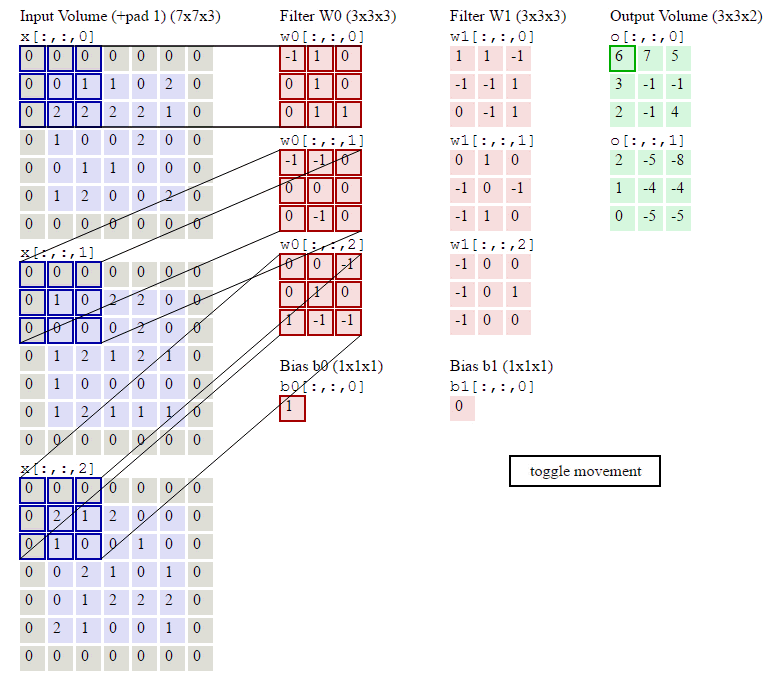


### Convolutional

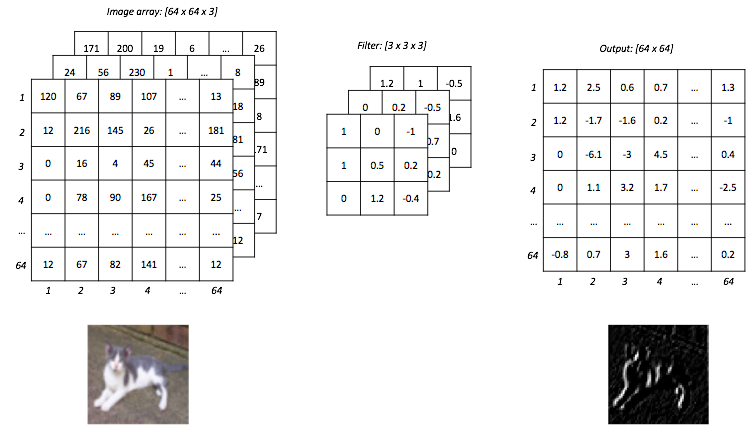

### Pooling

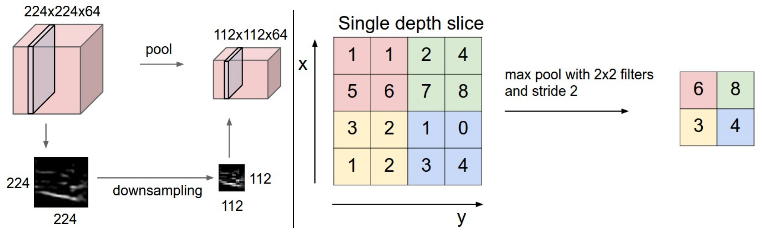

In [ ]:
from keras.layers import Input, Conv2D, MaxPool2D

import tensorflow as tf

# define model
with tf.device('/cpu:0'):
    x_in = Input(shape=(d1, d2, 1))
    x = Conv2D(10, 9)(x_in)
    x = MaxPool2D()(x)
    x = Conv2D(10, 3)(x)
    x = MaxPool2D()(x)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    x = Dense(100, activation='relu')(x)
    x_out = Dense(10, activation='softmax')(x)

    model = Model(inputs=x_in, outputs=x_out)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
SVG(model_to_dot(model).create(prog='dot', format='svg'))

#### A little bit of extra preprocessing...
The convolutional layers expect inputs with 3 dimensions

In [ ]:
import numpy as np

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')

In [ ]:
# fit model
model.fit(X_train,
          y_train,
          batch_size=1000,
          epochs=20,
          validation_data=(X_test, y_test),
          callbacks=cbs)

# check accuracy
y_hat = model.predict(X_test)
score = accuracy_score(y_hat.argmax(axis=1), y_test.argmax(axis=1))
print(f'accuracy: {score*100:.2f}%')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

idg = ImageDataGenerator(rotation_range=30)
print(type(idg.flow(X_train, y_train)))

In [ ]:
x, y = next(idg.flow(X_train, y_train, batch_size=1))
imshow(Image.fromarray(x.reshape(d1, d2)*255).resize((200, 200)))
print(f'y: {y.argmax()}')

In [ ]:
# fit model
model.fit_generator(idg.flow(X_train, y_train, batch_size=10000), steps_per_epoch=10,
          epochs=10,
          validation_data=(X_test, y_test),
          callbacks=cbs)

# check accuracy
y_hat = model.predict(X_test)
score = accuracy_score(y_hat.argmax(axis=1), y_test.argmax(axis=1))
print(f'accuracy: {score*100:.2f}%')

## Resources

- https://keras.io/
- https://www.tensorflow.org/
- https://playground.tensorflow.org/ Super fun!
- https://www.youtube.com/watch?v=aircAruvnKk basically this talk as a youtube video with nice animations




## References
Where I found the images
- https://jrbourbeau.github.io/madpy-ml-sklearn-2018/#/ classification/regression plots
- https://alykhantejani.github.io/a-brief-introduction-to-gradient-descent/ sgd plot
- http://www.denizyuret.com/2015/03/alec-radfords-animations-for.html sgd with momentum plot
- https://medium.com/swlh/ill-tell-you-why-deep-learning-is-so-popular-and-in-demand-5aca72628780 ml vs dl
- https://www.slideshare.net/idoshilon/deep-learning-at-nmc-devin-jones-72948322 dl = matrix multiplication
- https://stats.stackexchange.com/questions/263768/can-a-perceptron-with-sigmoid-activation-function-perform-nonlinear-classificati/263816 activation functions
- http://www.global-engage.com/life-science/deep-learning-in-digital-pathology/ shallow vs deep networks
- http://junma5.weebly.com/data-blog/build-your-own-neural-network-classifier-in-r decision boundary
- https://asdf0982.github.io/2017/06/08/CS231n%E5%AD%A6%E4%B9%A0%E7%AC%94%E8%AE%B0-%E5%8D%B7%E7%A7%AF%E7%BD%91%E7%BB%9C/ convolutional/max pooling layers
- http://www.subsubroutine.com/sub-subroutine/2016/9/30/cats-and-dogs-and-convolutional-neural-networks convolutional filters